In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a=np.arange(0,10,0.2)
print(a)
y=np.sin(a)
print(y)

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4.  4.2 4.4 4.6 4.8 5.  5.2 5.4 5.6 5.8 6.  6.2 6.4 6.6 6.8 7.
 7.2 7.4 7.6 7.8 8.  8.2 8.4 8.6 8.8 9.  9.2 9.4 9.6 9.8]
[ 0.          0.19866933  0.38941834  0.56464247  0.71735609  0.84147098
  0.93203909  0.98544973  0.9995736   0.97384763  0.90929743  0.8084964
  0.67546318  0.51550137  0.33498815  0.14112001 -0.05837414 -0.2555411
 -0.44252044 -0.61185789 -0.7568025  -0.87157577 -0.95160207 -0.993691
 -0.99616461 -0.95892427 -0.88345466 -0.77276449 -0.63126664 -0.46460218
 -0.2794155  -0.0830894   0.1165492   0.31154136  0.49411335  0.6569866
  0.79366786  0.8987081   0.96791967  0.99854335  0.98935825  0.94073056
  0.85459891  0.7343971   0.58491719  0.41211849  0.22288991  0.02477543
 -0.17432678 -0.36647913]


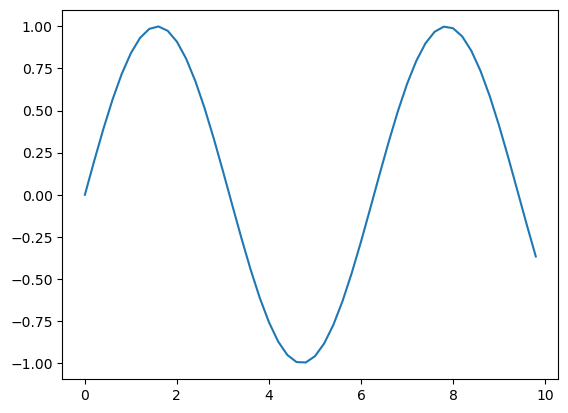

In [3]:
fig,ax=plt.subplots()
ax.plot(a,y,label="linear")

Alternate method to call the above graph 

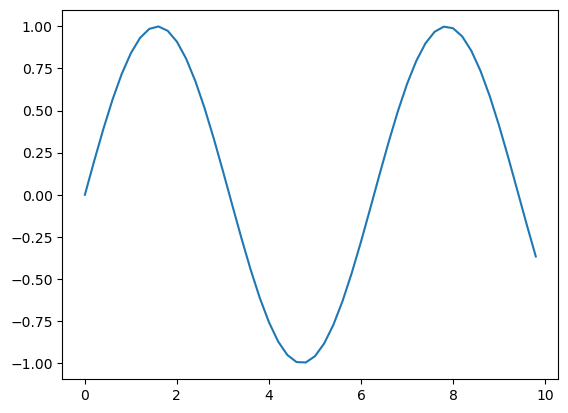

In [4]:
plt.plot(a,y,label="linear") 

In [5]:
x=np.arange(0,20,2)
sin=np.sin(x)
cos=np.cos(x)

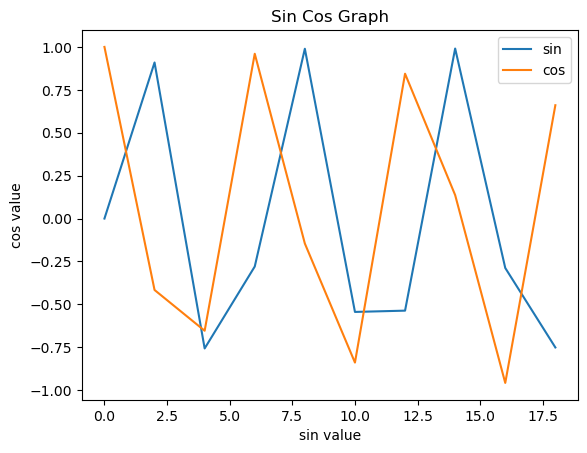

In [6]:
plt.plot(x,sin,label="sin")
plt.plot(x,cos,label="cos")
plt.xlabel("sin value")
plt.ylabel("cos value")
plt.title("Sin Cos Graph")
plt.legend()
plt.show()
plt.close()

In [7]:
from osgeo import gdal

In [8]:
file_name="haridwar.tif"

In [9]:
raster_info=gdal.Info(file_name,format="csv")

c:\Users\DELL\miniconda3\envs\geodata\Lib\site-packages\osgeo\gdal.py:311: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


Exception: Invalid value for format

In [ ]:
print(raster_info)

Driver: GTiff/GeoTIFF
Files: haridwar.tif
Size is 2000, 2000
Coordinate System is:
PROJCRS["WGS 84 / UTM zone 44N",
    BASEGEOGCRS["WGS 84",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 44N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",81,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre",1],
            ID["EPSG",8806]],
        PARAMET

In [ ]:
open=gdal.Open(file_name)
print(open)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001F294828B10> >


In [ ]:
band=open.GetRasterBand(1)
data=band.ReadAsArray()
print(data)

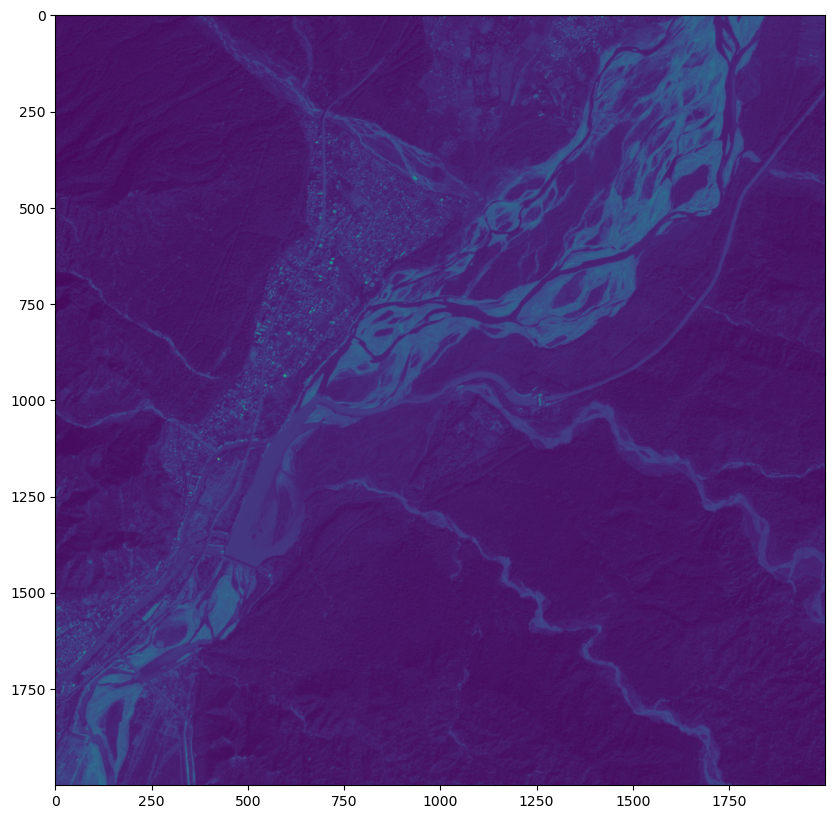

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(data)

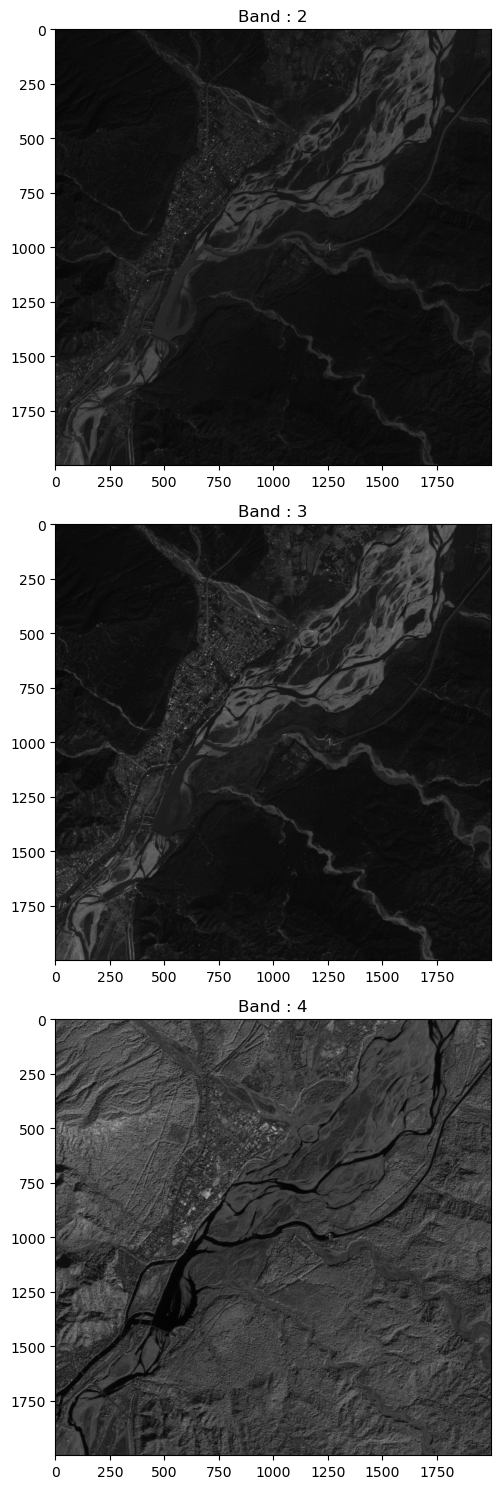

In [ ]:
plt.figure(figsize=(10,15))
for i in range(1,open.RasterCount+1):
    b=open.GetRasterBand(i)
    plt.subplot(3,1,i)
    plt.title("Band : "+str(i+1))
    plt.imshow(b.ReadAsArray(),cmap="gray")
    plt.tight_layout()

In [ ]:
multidata=open.ReadAsArray()

In [ ]:
multidata.shape

(3, 2000, 2000)

In [ ]:
multidata=np.transpose(multidata,axes=(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [28..306].


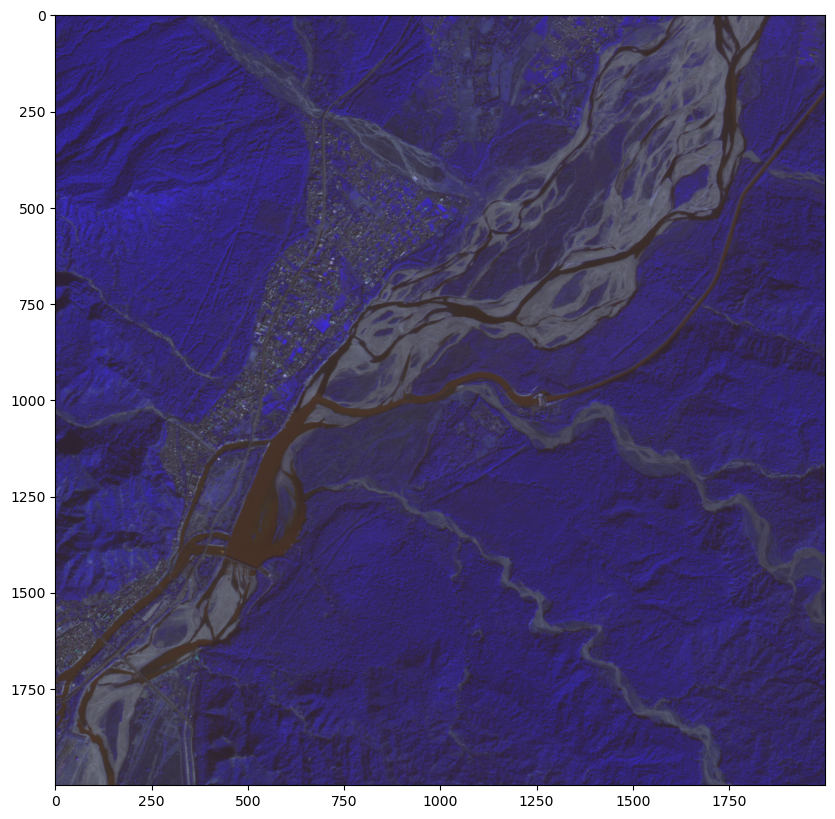

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(multidata)

In [ ]:
multidata=open.ReadAsArray(band_list=[2,3,1])

In [ ]:
multidata=np.transpose(multidata,axes=(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [28..306].


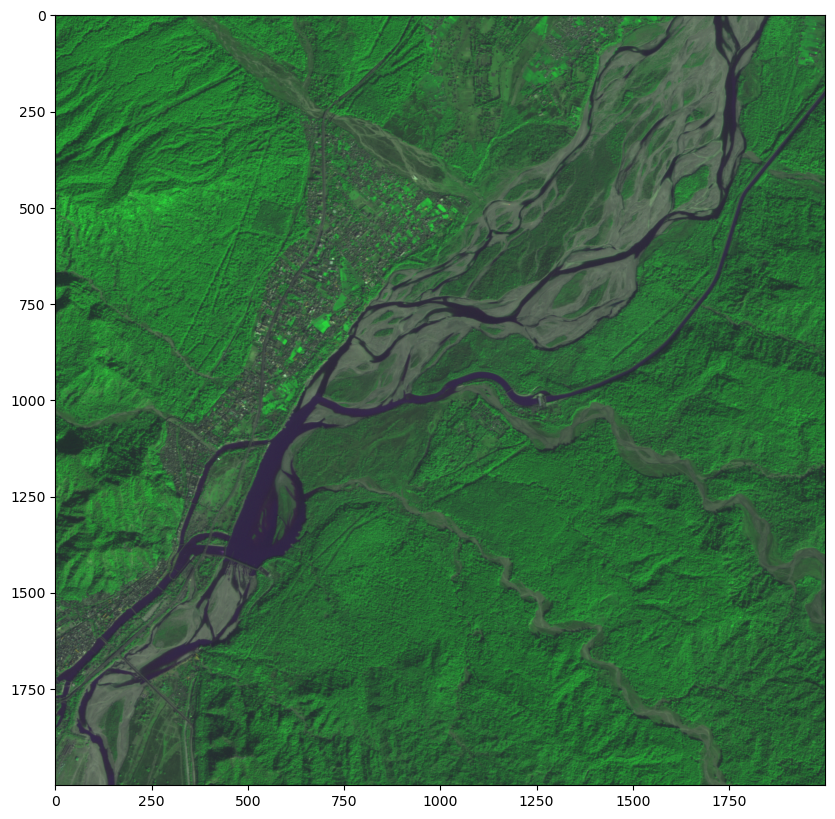

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(multidata)

Lecture 5 - NDVI

In [ ]:
ds=gdal.Open("haridwar.tif")

In [ ]:
red_band=ds.GetRasterBand(2)

In [ ]:
nir_band=ds.GetRasterBand(3)

In [ ]:
nir_band.ReadAsArray().dtype

dtype('uint16')

In [ ]:
red=red_band.ReadAsArray()*1.
nir=nir_band.ReadAsArray()*1.

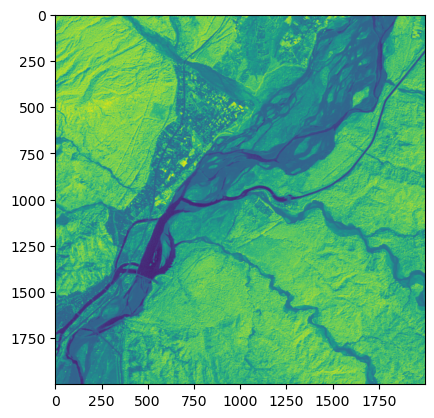

In [ ]:
ndvi=(nir-red)/(nir+red)
ndvi
plt.plot(figsize=(10,10))
plt.imshow(ndvi)

NDWI

In [ ]:
green_band=ds.GetRasterBand(1)
nir_band=ds.GetRasterBand(3)
green=green_band.ReadAsArray()*1.
nir=nir_band.ReadAsArray()*1.

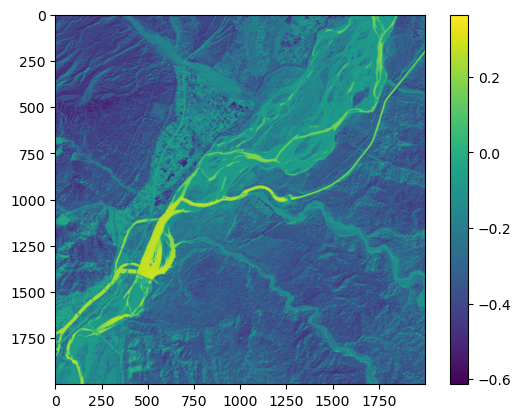

In [ ]:
ndwi=(green-nir)/(green+nir)
plt.plot(figsize=(10,10))
plt.imshow(ndwi)
plt.colorbar()

In [ ]:
fileformat="GTiff"

In [ ]:
driver=gdal.GetDriverByName(fileformat)

In [ ]:
print(driver.ShortName)
print(driver.LongName)

GTiff
GeoTIFF


In [ ]:
metadata=driver.GetMetadata()
print(metadata)

{'DCAP_COORDINATE_EPOCH': 'YES', 'DCAP_CREATE': 'YES', 'DCAP_CREATECOPY': 'YES', 'DCAP_OPEN': 'YES', 'DCAP_RASTER': 'YES', 'DCAP_VIRTUALIO': 'YES', 'DMD_CREATIONDATATYPES': 'Byte UInt16 Int16 UInt32 Int32 Float32 Float64 CInt16 CInt32 CFloat32 CFloat64', 'DMD_CREATIONOPTIONLIST': "<CreationOptionList>   <Option name='COMPRESS' type='string-select'>       <Value>NONE</Value>       <Value>LZW</Value>       <Value>PACKBITS</Value>       <Value>JPEG</Value>       <Value>CCITTRLE</Value>       <Value>CCITTFAX3</Value>       <Value>CCITTFAX4</Value>       <Value>DEFLATE</Value>       <Value>LZMA</Value>       <Value>ZSTD</Value>       <Value>LERC</Value>       <Value>LERC_DEFLATE</Value>       <Value>LERC_ZSTD</Value>   </Option>   <Option name='PREDICTOR' type='int' description='Predictor Type (1=default, 2=horizontal differencing, 3=floating point prediction)'/>   <Option name='DISCARD_LSB' type='string' description='Number of least-significant bits to set to clear as a single value or com

In [ ]:
dst_filename=r'op_raster1.tif'
src_file="L3-NH44G07-096-049-05Apr19-BAND2.tif"

In [ ]:
src_ds=gdal.Open(src_file)

In [ ]:
a=src_ds.ReadAsArray()
print(a)
a.size

[[ 91 101 101 ...  92  92  96]
 [ 96 101 102 ...  79  81  79]
 [100 102  98 ...  77  73  74]
 ...
 [103 107 107 ...  81  83  80]
 [ 96  97 100 ...  78  76  79]
 [ 93  96 101 ...  84  80  79]]


1324801

MACHINE LEARNING PREDICTION MODEL

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier as Dt
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv(r"water_train.csv",index_col=0)

In [ ]:
df.head()

Band2  Band3  Band4  Band5  Water
0     90     59     58     12      1
1     94     57     62     14      1
2     88     55     56     15      1
3     87     54     58     12      1
4     94     59     61     16      1

In [ ]:
df.tail()

Band2  Band3  Band4  Band5  Water
995     91     73    174    106      0
996     75     52    142     58      0
997     75     62    150     78      0
998     61     42    119     46      0
999     84     63    149     92      0

In [ ]:
y=df.pop("Water")
x=df

In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Water, Length: 1000, dtype: int64

In [ ]:
random_state=42

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=random_state,train_size=0.80)

In [ ]:
y_train.value_counts(),y_test.value_counts()

(Water
 1    404
 0    396
 Name: count, dtype: int64,
 Water
 0    104
 1     96
 Name: count, dtype: int64)

In [ ]:
x_train.describe()

Band2       Band3       Band4       Band5
count  800.000000  800.000000  800.000000  800.000000
mean    90.608750   64.925000  112.257500   62.812500
std     14.598444   16.198066   55.919495   56.775714
min     55.000000   37.000000   51.000000    9.000000
25%     86.000000   57.000000   60.000000   13.000000
50%     90.000000   60.000000   94.500000   39.500000
75%     95.000000   69.250000  165.000000  109.250000
max    303.000000  266.000000  365.000000  305.000000

In [ ]:
y_train.describe()

count    800.000000
mean       0.505000
std        0.500288
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Water, dtype: float64

In [ ]:
classifier=Dt()

In [ ]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
score=classifier.score(x_test,y_test)
print("Average Accuracy Score : {}".format(score))

Average Accuracy Score : 1.0


In [ ]:
test_pred=classifier.predict(x_test)

In [ ]:
cm=confusion_matrix